In [1]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [2]:
#manually idenifing train test splits
train_data=data[:1000]
train_target=target[:1000]

test_data=data[1000:]
test_target=target[1000:]

In [10]:
from keras.models import Sequential
from keras.layers import Conv1D,MaxPooling1D,Dense,Dropout,Activation,Flatten #1D because time series data

model=Sequential()

model.add(Conv1D(filters=128,input_shape=(data.shape[1:]),kernel_size=5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(Conv1D(filters=64,input_shape=(data.shape[1:]),kernel_size=5))
model.add(Activation('relu'))
model.add(MaxPooling1D(pool_size=4))

model.add(Flatten())
model.add(Dense(1))

model.compile(loss='mse',optimizer='adam')

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_3 (Conv1D)            (None, 46, 128)           768       
_________________________________________________________________
activation_3 (Activation)    (None, 46, 128)           0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 11, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 7, 64)             41024     
_________________________________________________________________
activation_4 (Activation)    (None, 7, 64)             0         
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 1, 64)             0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 64)                0         
__________

In [11]:
model.fit(train_data,train_target,epochs=100)

W0111 16:15:30.130199 140326428505920 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.

W0111 16:15:30.226175 140326428505920 deprecation_wrapper.py:119] From /mnt/f1853881-aeab-4d51-b774-c0beb0ce5052/anaconda3/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:973: The name tf.assign is deprecated. Please use tf.compat.v1.assign instead.



Epoch 1/100
1000/1000 [==============================] - 3s 3ms/step - loss: 0.0190
Epoch 2/100
1000/1000 [==============================] - 0s 160us/step - loss: 0.0044
Epoch 3/100
1000/1000 [==============================] - 0s 179us/step - loss: 0.0040
Epoch 4/100
1000/1000 [==============================] - 0s 198us/step - loss: 0.0039
Epoch 5/100
1000/1000 [==============================] - 0s 182us/step - loss: 0.0038
Epoch 6/100
1000/1000 [==============================] - 0s 188us/step - loss: 0.0037
Epoch 7/100
1000/1000 [==============================] - 0s 384us/step - loss: 0.0037
Epoch 8/100
1000/1000 [==============================] - 0s 328us/step - loss: 0.0036
Epoch 9/100
1000/1000 [==============================] - 0s 181us/step - loss: 0.0036
Epoch 10/100
1000/1000 [==============================] - 0s 191us/step - loss: 0.0035
Epoch 11/100
1000/1000 [==============================] - 0s 190us/step - loss: 0.0034
Epoch 12/100
1000/1000 [==============================

1000/1000 [==============================] - 0s 187us/step - loss: 0.0020
Epoch 96/100
1000/1000 [==============================] - 0s 170us/step - loss: 0.0019
Epoch 97/100
1000/1000 [==============================] - 0s 214us/step - loss: 0.0019
Epoch 98/100
1000/1000 [==============================] - 0s 255us/step - loss: 0.0021
Epoch 99/100
1000/1000 [==============================] - 0s 271us/step - loss: 0.0020
Epoch 100/100
1000/1000 [==============================] - 0s 238us/step - loss: 0.0021


In [13]:
result=model.predict(test_data)

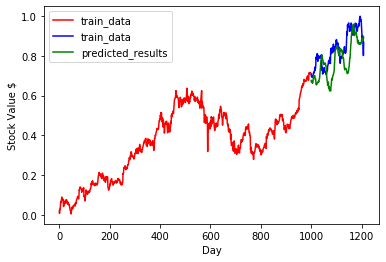

In [14]:
from matplotlib import pyplot as plt

plt.plot(train_target,'r',label='train_data')
plt.plot(np.arange(1000,1209),test_target,'b',label='train_data')
plt.plot(np.arange(1000,1209),result,'g',label='predicted_results')
plt.xlabel('Day')
plt.ylabel('Stock Value $')
plt.legend()
plt.show()

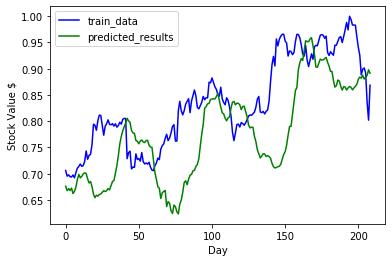

In [16]:

plt.plot(test_target,'b',label='train_data')
plt.plot(result,'g',label='predicted_results')
plt.xlabel('Day')
plt.ylabel('Stock Value $')
plt.legend()
plt.show()

In [17]:
from sklearn.metrics import r2_score

r2= r2_score(test_target,result)
print('R2 score',r2)

R2 score -0.2292089405205453
